# Tekst jako łańcuch znaków

<br/>

## dr inż. Aleksander Smywiński-Pohl

## apohllo@agh.edu.pl

## http://apohllo.pl/dydaktyka/nlp

# Plan wykładów

* tekst jako łańcuch znaków
* tekst jako zbiór zjawisk językowych
* modele analizy tekstu
* zastosowania metod przetwarzaniu tekstu

<center><img src="img/letters.jpg" width="800px"/><br/>

<small>https://www.independent.co.uk/voices/i-m-through-writing-letters-and-it-seems-i-m-not-only-one-a6716496.html</small>
</center>

## Problem: wyszukiwanie dokumentu z określonym wyrazem

Znalezienie w bazie danych wierszy dla których w kolumna `value` ma wartość `wirus`.

Znalezienie tekstów w których występuje wyraz `wirus`.

In [ ]:
a = 1.00001

if(a == 1):
    print("Zmienna ma wartość 1")
    
if(abs(a - 1) < 1e-3):
    print("Zmienna ma wartość zbliżoną do 1")

* **czy uwzględniamy pisownię wielką i małą literą?**

* czasami języka programowania może nie wspierać zamiany na małe litery w przypadku występowania znaków diakrytycznych

np. Ruby v. 1.9.3 (i wiele późniejszych wersji)

```
1.9.3-p551 :001 > "Ł".downcase
 => "Ł" 
1.9.3-p551 :002 > 
```

Ruby 2.7.0
```
2.7.0 :001 > "Ł".downcase
 => "ł" 
2.7.0 :002 > 
```

Działanie programu może zależeć od wersji języka, z której korzystamy. Jeśli inna jest wersja na komputerze 
programisty i na produkcji, to bardzo łato mogą pojawić się błędy.

* **czy uwzględniamy fleksję? - wirus, wirusa, wirusowi, wirusem**

http://morfeusz.sgjp.pl/demo/

Przykłady wieloznaczności morfologicznej

* przyglądam się *wirusowi*
* pacjenci *wirusowi*

In [2]:
from morfeusz2 import Morfeusz
import pandas as pd

morf = Morfeusz()
forms = morf.generate("Paryż")


In [5]:
pd.DataFrame(forms, columns=['inflected form', 'base form', 'tags', 'categories', 'misc'])

,inflected form,base form,tags,categories,misc
0,Paryż,Paryż:Sf,subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:f,[nazwisko],[]
1,Paryż,Paryż:Sm1,subst:sg:nom:m1,[nazwisko],[]
2,Paryża,Paryż:Sm1,subst:sg:gen.acc:m1,[nazwisko],[]
3,Paryżowi,Paryż:Sm1,subst:sg:dat:m1,[nazwisko],[]
4,Paryżem,Paryż:Sm1,subst:sg:inst:m1,[nazwisko],[]
5,Paryżu,Paryż:Sm1,subst:sg:loc:m1,[nazwisko],[]
6,Paryżu,Paryż:Sm1,subst:sg:voc:m1,[nazwisko],[]
7,Paryżowie,Paryż:Sm1,subst:pl:nom.voc:m1,[nazwisko],[]
8,Paryżów,Paryż:Sm1,subst:pl:gen.acc:m1,[nazwisko],[]
9,Paryżom,Paryż:Sm1,subst:pl:dat:m1,[nazwisko],[]


* większość dostępnych narzędzi posiada ograniczone wsparcie dla obsługi fleksji języka polskiego

* **czy uwzględniamy słowotwórstwo i relacje morfologiczne? - wirus/wirusowe, lekarz/leczenie**

<center><img src="img/wirus-wn.png" width="800px"/></center>

<center><img src="img/wirus-derywacja.png" width="400px"/></center>

* zasadniczo brak jest słowników, które zawierałyby kompletny opis dla języka polskiego
* wykorzystanie Wordnetu wymaga uprzedniego powiązania formy ze znaczeniem, co jest nietrywialne

* **skąd pochodzą teksty?**

* A­a
* A a

* **jak szybko można to policzyć?**

* chcemy przeszukać zbiór danych zawierającym terabajty tekstu
* chcemy znaleźć konkretne dokumenty zawierające dane słowo

In [4]:
s1 = "A­a"
s2 = "A a"
print(len(s1))
print(s2 == "A a")

3
False


* teksty z internetu będą miały bardzo dużą liczbę wyrażeń, które nie są wyrazami
* teksty pochodzące z edytorów mogą zawierać artefakty takie jak niełamliwe spacje oraz miejsca podziału słów

## Zliczanie wystąpień wyrażenia w tekście

W których dokumentach występuje wyrażenie `wirusowe zapalenie wątroby`?

* **czy wszystkie wyrazy są odmienne?**

* **czy pomiędzy wyrazami mogą występować inne wyraz nie należące do wyrażenia?**

* **czy spacja jest zawsze tym czym nam się wydaje, że jest?**

* **czy uwzględniamy skróty?** (WZW)

* **czy uwzględniamy synonimy?** (żółtaczka)

# Trójkąt semantyczny Ogdena-Richardsa

&nbsp;

<center><img src="img/semiotic-triangle.png" width="700px"/></center>

## Problem kodowania znaków

Popularne rodzaje kodowania znaków (z uwzględnieniem języka polskiego):
* ASCII
* iso-8859-2 (Unix)
* code page 1250 (Windows)
* Unicode: UTF-8, UTF-16 (Windows, Unix, Web)

## ASCII

*American Standard Code for Information Interchange*

<center><img src="img/ascii_table_pragimtech.png"/></center>

## ISO-8859-2 vs. CP1250 (1 bajtowe kodowanie)

### ISO-8859-2
* Albanian, Bosnian, Croatian, Czech, , German, Hungarian, Polish, Serbian, Slovak, Slovene, Upper Sorbian, Lower  Sorbian, Turkmen

### CP1250
* Albanian, Bosnian, Croatian, Czech, German, Hungarian, Polish, Serbian, Slovak, Slovene, Romanian

<center><img src="img/iso-vs-cp.png" width="1400px"/></center>

In [1]:
!cat iso-8859-2.txt

import codecs
with codecs.open("iso-8859-2.txt", 'r', 'iso-8859-2') as f:
    for line in f:
        print(line)

Za��� g�l� ja��
Zażółć gęślą jaźń



## Unicode + UTF-8, UTF-16, UTF-32

**Unikod (ang. Unicode)** – komputerowy zestaw znaków mający w zamierzeniu obejmować wszystkie alfabety używane na świecie.

**UTF-8 (ang. 8-bit Unicode Transformation Format)** – system kodowania Unicode, wykorzystujący od 1 do 4 bajtów do zakodowania pojedynczego znaku, w pełni kompatybilny z ASCII.

**UTF-16 (ang. 16-bit Unicode Transformation Format)** – jeden ze sposobów kodowania znaków standardu Unicode (2 lub 4 bajty,  <= U+10000 kodowane na 2 bajtach).

**UTF-32 (ang. 32-bit unicode transformation format)** – jeden ze sposobów kodowania znaków standardu Unicode (zawsze 4 bajty). 

(Źródło: Wikipedia)

## Unicode

| Wersja | Data | Publikacja | Oznaczenie | Liczba zestawów znaków | Liczba znaków | Liczba nowych znaków |
|--------|------|------------|------------|------------------------|---------------|----------------------|
| 13.0	 | March 2020 | ISBN 978-1-936213-26-9 | ISO/IEC 10646:2020[51] | 154 | 143,859 | 5,930 added) |

<center><img src="img/unicode-table.png" width="1200px"/></center>

## Latin Extended-A

<center><img src="img/unicode-a-c.png" width="900px"/></center>

In [2]:
!pip install unidecode
!pip install demoji

  Using cached demoji-1.1.0-py3-none-any.whl (42 kB)


In [3]:
from unidecode import unidecode

print(unidecode("Kaplica Sykstyńska"))
print(unidecode("Сикстинская капелла")) # cyrylica
print(unidecode("Καπέλα Σιστίνα")) # grecki 
print(unidecode("西斯汀小堂")) # chiński
print(unidecode("Սիքստինյան կապելլա")) # ormiański

Kaplica Sykstynska
Sikstinskaia kapella
Kapela Sistina
Xi Si Ting Xiao Tang 
Sik`stinyan kapella


In [4]:
import demoji
#demoji.download_codes()

demoji.findall("""
#startspreadingthenews yankees win great start by 🎅🏾 going 5strong innings with 5k’s🔥 🐂 solo homerun 🌋🌋 
with 2 solo homeruns and👹 3run homerun… 🤡 🚣🏼 👨🏽‍⚖️ with rbi’s … 🔥🔥
🇲🇽 and 🇳🇮 to close the game🔥🔥!!!….
WHAT A GAME!!..
""")

{'🎅🏾': 'Santa Claus: medium-dark skin tone',
 '🇳🇮': 'flag: Nicaragua',
 '🤡': 'clown face',
 '👹': 'ogre',
 '🚣🏼': 'person rowing boat: medium-light skin tone',
 '🐂': 'ox',
 '🌋': 'volcano',
 '🇲🇽': 'flag: Mexico',
 '👨🏽\u200d⚖️': 'man judge: medium skin tone',
 '🔥': 'fire'}

## UTF-8

### Zalety
* Każdy tekst w ASCII jest tekstem w UTF-8.
* Żaden znak spoza ASCII nie zawiera bajtu z ASCII.
* Zachowuje porządek sortowania UCS-4.
* Typowy tekst ISO-Latin-X rozrasta się w bardzo niewielkim stopniu po przekonwertowaniu do UTF-8.
* Nie zawiera bajtów 0xFF i 0xFE, więc łatwo można go odróżnić od tekstu UTF-16.
* Znaki o kodzie różnym od 0 nie zawierają bajtu 0, co pozwala stosować UTF-8 w ciągach zakończonych zerem.
* O każdym bajcie wiadomo, czy jest początkiem znaku, czy też leży w jego środku, co nie jest dostępne np. w kodowaniu EUC.
* Nie ma problemów z little endian vs big endian.
* Jest domyślnym kodowaniem w XML (również w jego aplikacjach: XHTML, SVG, XSL, CML, MathML).

## UTF-8 

### Wady
* Znaki CJK zajmują po 3 bajty zamiast 2 w kodowaniach narodowych.
* Znaki alfabetów niełacińskich zajmują po 2 bajty zamiast jednego w kodowaniach narodowych.
* UTF-8 nie używa przesunięć zasięgów, co stanowi dodatkowe utrudnienie dla implementacji UTF-8

(Źródło: Wikipedia)

# Unicode i łańcuchy w Pythonie

In [1]:
ord('a'), ord('Ġ'), ord('🦠')

(97, 288, 129440)

`ord` zwraca identyfikator symbolu w Unicode

In [2]:
chr(129440), chr(129441), chr(32123)

('🦠', '🦡', '絻')

`chr` zamienia identyfikator na łańcuch znaków

# Znaki i bajty

In [3]:
text_sample = "Alice"
utf8_bytes = text_sample.encode('utf-8')
print(f'bytes literal (hex):\n{utf8_bytes}', end='\n---\n')
print(f'bytes list (decimal):\n{list(utf8_bytes)}', end='\n---\n')
print(f'Length: {len(utf8_bytes)}')

bytes literal (hex):
b'Alice'
---
bytes list (decimal):
[65, 108, 105, 99, 101]
---
Length: 5


In [4]:
type(utf8_bytes)

bytes

In [7]:
# The second symbol is a connection of two symbols ล and ิ
text_sample = "อลิซ"
utf8_bytes = text_sample.encode('utf-8')
print(f'bytes literal (hex):\n{utf8_bytes}', end='\n---\n')
print(f'bytes list (decimal):\n{list(utf8_bytes)}', end='\n---\n')
print(f'Length: {len(utf8_bytes)}')

bytes literal (hex):
b'\xe0\xb8\xad\xe0\xb8\xa5\xe0\xb8\xb4\xe0\xb8\x8b'
---
bytes list (decimal):
[224, 184, 173, 224, 184, 165, 224, 184, 180, 224, 184, 139]
---
Length: 12


# Odległość edycyjna łańcuchów znaków

Minimalna liczba operacji:
* usunięcia
* dodania
* zamiany

pojedynczego znaku, dzięki którym łańcych `S1` może zostać przekształcony w łańcuch `S2`.



<table class="multicol" role="presentation" style="border-collapse: collapse; padding: 0; border: 0; background:transparent; width:auto;"><tbody><tr>
<td style="text-align: left; vertical-align: top;">
<table class="wikitable">
<tbody><tr>
<td>
</td>
<td>
</td>
<th>k
</th>
<th>i
</th>
<th>t
</th>
<th>t
</th>
<th>e
</th>
<th>n
</th></tr>
<tr>
<td></td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6
</td></tr>
<tr>
<th>s
</th>
<td>1</td>
<td><span title="substitution of &#39;s&#39; for &#39;k&#39;" style="border-bottom:1px dotted">1</span></td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6
</td></tr>
<tr>
<th>i
</th>
<td>2</td>
<td>2</td>
<td><span title="&#39;i&#39; equals &#39;i&#39;" style="border-bottom:1px dotted">1</span></td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5
</td></tr>
<tr>
<th>t
</th>
<td>3</td>
<td>3</td>
<td>2</td>
<td><span title="&#39;t&#39; equals &#39;t&#39;" style="border-bottom:1px dotted">1</span></td>
<td>2</td>
<td>3</td>
<td>4
</td></tr>
<tr>
<th>t
</th>
<td>4</td>
<td>4</td>
<td>3</td>
<td>2</td>
<td><span title="&#39;t&#39; equals &#39;t&#39;" style="border-bottom:1px dotted">1</span></td>
<td>2</td>
<td>3
</td></tr>
<tr>
<th>i
</th>
<td>5</td>
<td>5</td>
<td>4</td>
<td>3</td>
<td>2</td>
<td><span title="substitution of &#39;i&#39; for &#39;e&#39;" style="border-bottom:1px dotted">2</span></td>
<td>3
</td></tr>
<tr>
<th>n
</th>
<td>6</td>
<td>6</td>
<td>5</td>
<td>4</td>
<td>3</td>
<td>3</td>
<td><span title="&#39;n&#39; equals &#39;n&#39;" style="border-bottom:1px dotted">2</span>
</td></tr>
<tr>
<th>g
</th>
<td>7</td>
<td>7</td>
<td>6</td>
<td>5</td>
<td>4</td>
<td>4</td>
<td><span title="insert &#39;g&#39;" style="border-bottom:1px dotted">3</span>
</td></tr></tbody></table>
<p>&#32;
</p>
</td>
<td style="text-align: left; vertical-align: top; padding-left: 1em;">
<table class="wikitable">
<tbody><tr>
<td>
</td>
<td>
</td>
<th>S
</th>
<th>a
</th>
<th>t
</th>
<th>u
</th>
<th>r
</th>
<th>d
</th>
<th>a
</th>
<th>y
</th></tr>
<tr>
<td>
</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7</td>
<td>8
</td></tr>
<tr>
<th>S
</th>
<td>1</td>
<td><span title="&#39;S&#39; equals &#39;S&#39;" style="border-bottom:1px dotted">0</span></td>
<td><span title="delete &#39;a&#39;" style="border-bottom:1px dotted">1</span></td>
<td><span title="delete &#39;t&#39;" style="border-bottom:1px dotted">2</span></td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6</td>
<td>7
</td></tr>
<tr>
<th>u
</th>
<td>2</td>
<td>1</td>
<td>1</td>
<td>2</td>
<td><span title="&#39;u&#39; equals &#39;u&#39;" style="border-bottom:1px dotted">2</span></td>
<td>3</td>
<td>4</td>
<td>5</td>
<td>6
</td></tr>
<tr>
<th>n
</th>
<td>3</td>
<td>2</td>
<td>2</td>
<td>2</td>
<td>3</td>
<td><span title="substitution of &#39;n&#39; for &#39;r&#39;" style="border-bottom:1px dotted">3</span></td>
<td>4</td>
<td>5</td>
<td>6
</td></tr>
<tr>
<th>d
</th>
<td>4</td>
<td>3</td>
<td>3</td>
<td>3</td>
<td>3</td>
<td>4</td>
<td><span title="&#39;d&#39; equals &#39;d&#39;" style="border-bottom:1px dotted">3</span></td>
<td>4</td>
<td>5
</td></tr>
<tr>
<th>a
</th>
<td>5</td>
<td>4</td>
<td>3</td>
<td>4</td>
<td>4</td>
<td>4</td>
<td>4</td>
<td><span title="&#39;a&#39; equals &#39;a&#39;" style="border-bottom:1px dotted">3</span></td>
<td>4
</td></tr>
<tr>
<th>y
</th>
<td>6</td>
<td>5</td>
<td>4</td>
<td>4</td>
<td>5</td>
<td>5</td>
<td>5</td>
<td>4</td>
<td><span title="&#39;y&#39; equals &#39;y&#39;" style="border-bottom:1px dotted">3</span>
</td></tr></tbody></table>
<p>&#32;
</p>
</td></tr></tbody></table>

źródło: https://en.wikipedia.org/wiki/Levenshtein_distance

Odległość może być wykorzystywana do zgrubnego wyszukiwania "podobnych" łańcuchów znaków.

# Did you mean?

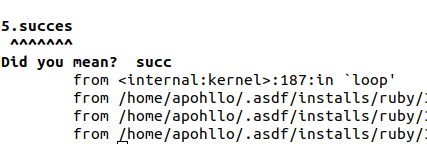

## Implementacje 

* algorytm dynamiczny - do porównywania pojedynczych łańcuchów znaków
* algorytm korekty tekstu Norviga - odwrócenie problemu
  https://norvig.com/spell-correct.html
* Levenshtein automaton - znacznie szybszy niż algorytm Norviga, zaimplementowany np. w ElasticSearch

## Przykładowe zastosowania miary edycyjnej

* wyszukiwanie przybliżone (fuzzy search - did you mean?)
* automatyczna korekta tekstu
* interpretacja komend głosowych

## Narzędzia

* Fuzzywuzzy - https://github.com/seatgeek/fuzzywuzzy
* ElasticSearch - fuzzy match 
  https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-fuzzy-query.html
* Algorytm Norviga - https://norvig.com/spell-correct.html
* Language tool - https://www.languagetool.org/
* biblioteka regex - https://pypi.org/project/regex/

In [5]:
import re

pattern = re.compile('wirus')
texts = ["wrius", "wirrus", "wirs"]
for text in texts:
    match_data = pattern.search(text)
    if(match_data):
        print(match_data[0])

In [6]:
import regex

pattern = regex.compile(r'(wirus\b){e<=1}')
texts = ["virus", "wirrus", "wirusa"]
for text in texts:
    match_data = pattern.search(text)
    if(match_data):
        print(match_data[0])

virus
wirrus
wirusa


# Wyrażenia regularne

* pozwalają na konstrukcję wzorców dopasowujących się do tekstu
* pozwalają na uwzględnienie wariantów w pisowni
* w ograniczonym stopniu pozwalają na uwzględnienie błędów w pisowni
* w ograniczonym stopniu pozwalają na uwzględnienie fleksji
* wiele realnie działających systemów przetwarzających tekst opiera się w dużej mierze na wyrażeniach regularnych
* przygotowywanie danych np. do treningu w zasadzie zawsze wymaga użycia wyrażeń regularnych

# Jakie metaznaki występują w wyrażeniach regularnych?

In [1]:
import re

pattern = re.compile('łódź', re.I)
text = "Łódź to stolica województwa łódzkiego"
if(pattern.search(text)):
    print("Wyrażenie zostało dopasowane")

Wyrażenie zostało dopasowane


In [2]:
tab = ["Poznań", "Łódź", "Andrychów"]
sorted(tab)

['Andrychów', 'Poznań', 'Łódź']

In [3]:
pattern = re.compile(r'\bwirus(\w*)',)
texts = ["a _wirusów", "wirusowe zapalenie wątroby", "wirusy są groźne", "koronawirus", "1wirus", "wirusów"]
for text in texts:
    match_data = pattern.search(text)
    if(match_data):
        print(match_data[0])

wirusowe
wirusy
wirusów


# Wyrażenia regularne 

* Podstawowe metaznaki:
  * `*` – (kwantyfikator) zero lub więcej wystąpień
  * `()` – grupowanie wyrażeń dla kwantyfikatorów, alternatywy, dopasowań wstecznych
  * `|` – alternatywa – jedna opcja spośród wielu
* Kwantyfikatory (określają ile razy ma być dopasowane wyrażenie, które stoi przed nimi):
  * `*` – zero lub więcej wystąpień (to samo co wyżej)
  * `+` – jedno lub więcej wystąpień
  * `?` – zero lub jedno wystąpienie

* Kotwice (dopasowują się do pozycji w łańcuchu, a nie konkretnych znaków):
  * `^` – początek linii
  * `$` – koniec linii
  * `\b` – granica słowa
  * `\<` – początek słowa
  * `\>` – koniec słowa
* Klasy znaków:
  * `[]` – jeden ze znaków znajdujących się wewnątrz nawiasów
  * `^` – pojawiając się na początku w kontekście klasy znaków powoduje jej zanegowanie
  * `a-z` – zakres znaków (tylko wew. nawiasów kwadratowych)
  * `\w` – znak będący literą, cyfrą lub podkreśleniem
  * `\s` – znak będący białą spacją (spacja, tabulator, koniec linii, etc.)
  * `\d` – cyfra
  * `.` – dowolny znak (zazwyczaj – niebędący końcem linii)

https://regex101.com/r/pTEWml/2

## Zaawansowane własności wyrażeń regularnych

* Wsparcie dla Unicode:
  * https://www.regular-expressions.info/unicode.html
  * `\p{L}` - litery z dowolnego alfabetu (np. a, ą, ć, ü, カ)
  * `\p{Ll}` - mała litera z dowolnego alfabetu
  * `\p{Lu}` - wielka litera z dowolnego alfabetu
  * `\X` - dowonly znak Unicode (jak `.` ale automatycznie uwzględnia znaki przejścia do nowej linii)
* *positive lookahead* 
  * wyrażenie `(\w+)(?= ma kota)` dopasuje się do łańcucha Ala ma kota, ale dopasowanie obejmie tylko słowo Ala.
* *negative lookbehind* 
  * wyrażenie `(?<!starych )(zł)` dopasuje się do łańcucha 10 złotych ale nie do łańcucha 10 starych złotych.

In [10]:
import re

text = "aaa"
print(re.findall("aa", text))
print(re.findall("a(?=a)", text))

['aa']
['a', 'a']


In [11]:
text1 = "New York"
text2 = "Yorkshire"

print(re.findall("(?<!New )York", text1))
print(re.findall("(?<!New )York", text2))

[]
['York']


## Narzędzia

* Python
  * `re` - standardowa biblioteka - https://docs.python.org/3/library/re.html
  * `pip install regex` - biblioteka instalowana osobno - https://pypi.org/project/regex/
* Java, Kotlin (JVM)
  * java.util.regex.Pattern - https://docs.oracle.com/javase/7/docs/api/java/util/regex/Pattern.html
* Ruby 
  * literał `/a.*/` - https://ruby-doc.org/core-2.5.1/Regexp.html
* Javascript, Kotlin (JS) 
  * literał `/a.*/` - https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions

# Literatura

[Speech and Language Processing. Daniel Jurafsky & James H. Martin, chapter 2](https://web.stanford.edu/~jurafsky/slp3/2.pdf)